# Iris Flowers Classification

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
i

In [ ]:
df=pd.read_csv("Iris.csv")

In [30]:
df.shape

(150, 6)

In [31]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [33]:
ds=df.drop(['Id'],axis=1)

In [34]:
ds.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
ds.shape

(150, 5)

In [36]:
ds.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [37]:
ds.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            False         False          False         False    False
1            False         False          False         False    False
2            False         False          False         False    False
3            False         False          False         False    False
4            False         False          False         False    False
..             ...           ...            ...           ...      ...
145          False         False          False         False    False
146          False         False          False         False    False
147          False         False          False         False    False
148          False         False          False         False    False
149          False         False          False         False    False

[150 rows x 5 columns]>

In [38]:
ds.value_counts()

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species        
4.9            3.1           1.5            0.1           Iris-setosa        3
5.8            2.7           5.1            1.9           Iris-virginica     2
               4.0           1.2            0.2           Iris-setosa        1
5.9            3.0           4.2            1.5           Iris-versicolor    1
6.2            3.4           5.4            2.3           Iris-virginica     1
                                                                            ..
5.5            2.3           4.0            1.3           Iris-versicolor    1
               2.4           3.7            1.0           Iris-versicolor    1
                             3.8            1.1           Iris-versicolor    1
               2.5           4.0            1.3           Iris-versicolor    1
7.9            3.8           6.4            2.0           Iris-virginica     1
Length: 147, dtype: int64

In [39]:
ds["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [40]:
ds.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

<AxesSubplot:>

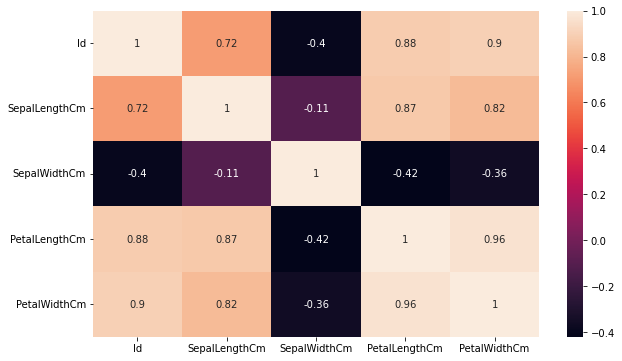

In [41]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

plt.subplots(figsize=(10, 6))
sns.heatmap(corr, annot=True)

In [44]:
from sklearn.preprocessing import LabelEncoder


In [45]:
X = df.iloc[:, 1:5].values
y = df.iloc[:, 5].values

le = LabelEncoder()
y = le.fit_transform(y)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<Figure size 432x288 with 0 Axes>

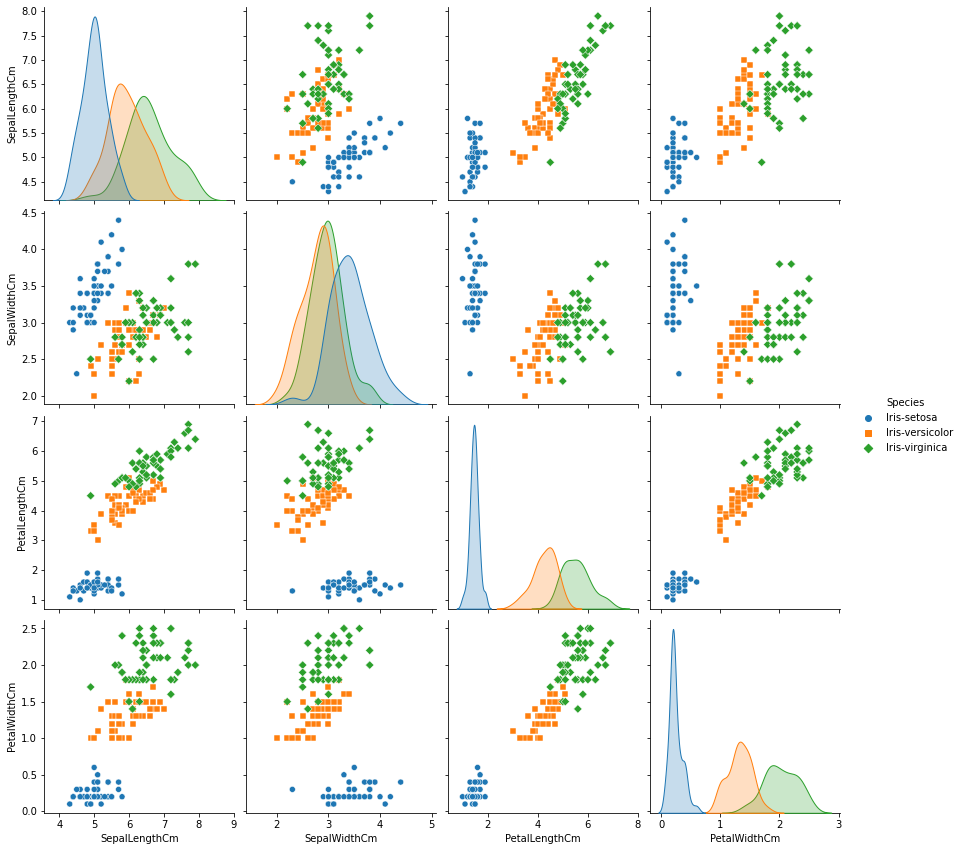

In [47]:
plt.figure()
sns.pairplot(df.drop("Id", axis=1), hue = "Species", height=3, markers=["o", "s", "D"])
plt.show()

In [49]:
classifier = KNeighborsClassifier(n_neighbors=3)

In [50]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [51]:
y_pred = classifier.predict(X_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy: ' + str(round(accuracy, 2)) + '%')

Accuracy: 96.67%
